# Ground-Cover Classification Activity

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal

In [2]:
# satellite_2004_full = gdal.Open('/data/rs/2004.img').ReadAsArray() / 255
# satellite_2010_full = gdal.Open('/data/rs/2010.img').ReadAsArray() / 255
satellite_2004_full = np.load('../data/rs/2004.npy')
satellite_2010_full = np.load('../data/rs/2010.npy')

In [3]:
scale_by = .25
import scipy.misc
def scale_image(img, size):
    return np.array([scipy.misc.imresize(chan, size) for chan in img])
satellite_2004 = scale_image(satellite_2004_full, scale_by)
satellite_2010 = scale_image(satellite_2010_full, scale_by) 

In [4]:
rows, cols = satellite_2010.shape[1:]
assert rows, cols == satellite_2004.shape[1:]

In [5]:
def show_image(img, ax=None):
    if len(img.shape) == 3:
        img = np.transpose(img, (1,2,0))
    if ax is None:
        plt.imshow(img, interpolation='nearest')
    else:
        ax.imshow(img, interpolation='nearest')

def show_rgb(red, green, blue, ax=None):
    show_image(np.array([red, green, blue]), ax=ax)


Cambia el codigo para mostrar el imagen en la manera mejor que encontraste en la actividad pasada.

<IPython.core.display.Javascript object>


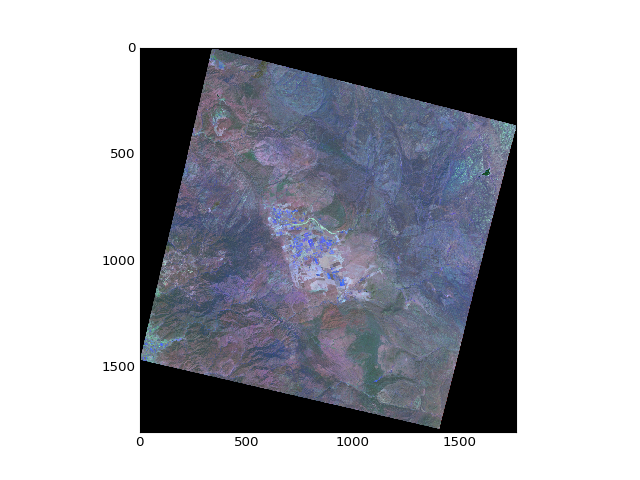

In [13]:
fig, axes = plt.subplots()
green, red, NIR, MIR = satellite_2010
show_rgb(red=MIR, green=NIR, blue=green)

# Define the Problem

We're going to try to identify ground cover.

* Input: a satellite image
* Output: which class we think each pixel is in. Specifically: is this pixel vegetation or not?

In [16]:
import sklearn.cluster
cluster = sklearn.cluster.MiniBatchKMeans(n_clusters=12)
np.reshape(satellite_2010, (4, -1)).shape
clustered_2010 = cluster.fit_predict(np.reshape(satellite_2010, (4, -1)).T).reshape(satellite_2010.shape[1:])

/Users/kcarnold/anaconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1279: DeprecationWarning: This function is deprecated. Please call randint(0, 3180565 + 1) instead
  0, n_samples - 1, init_size)
/Users/kcarnold/anaconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 3180565 + 1) instead
  0, n_samples - 1, init_size)
/Users/kcarnold/anaconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 3180565 + 1) instead
  0, n_samples - 1, init_size)
/Users/kcarnold/anaconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 3180565 + 1) instead
  0, n_samples - 1, init_size)
/Users/kcarnold/anaconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1328: DeprecationWarning: This function is deprecated. Please call randin

In [17]:
def show_img_and_classes(red, green, blue, classes):
    fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(13,5))
    show_rgb(red=red, green=green, blue=blue, ax=axs[0])
    axs[1].imshow(classes)

<IPython.core.display.Javascript object>


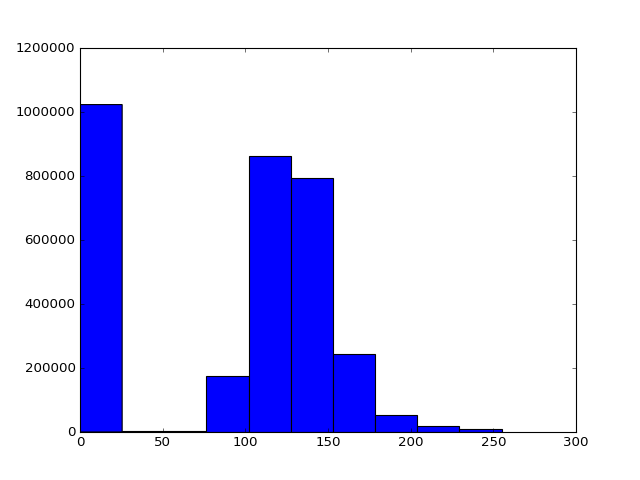

(array([ 1023192.,     1895.,     3531.,   173716.,   862925.,   792428.,
          243602.,    51687.,    19630.,     7960.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

In [25]:
plt.figure()
plt.hist(green.ravel())

<IPython.core.display.Javascript object>


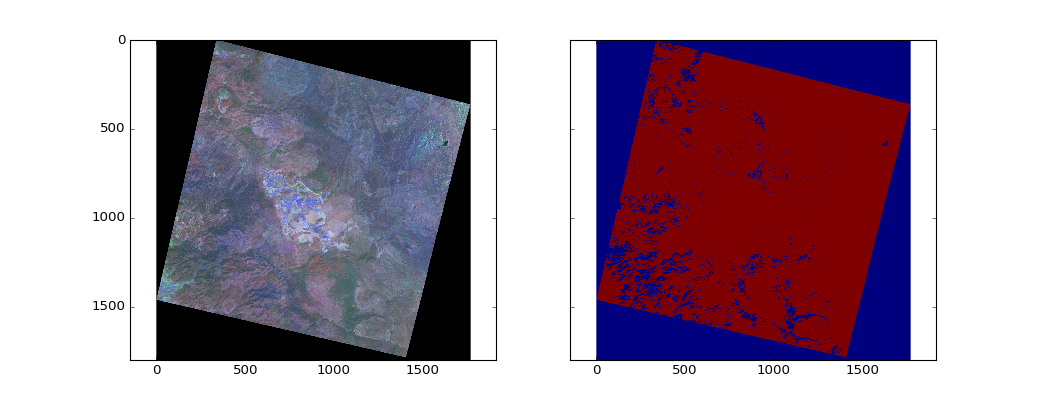

In [26]:
veg = green > 100
show_img_and_classes(red=MIR, green=NIR, blue=green, classes=veg)